In [111]:
!pip install names

     |████████████████████████████████| 798kB 6.5MB/s 
  Created wheel for names: filename=names-0.3.0-cp36-none-any.whl size=803689 sha256=883176e233d0a0179ea2da223f168465390b3493d73ffc98d0493a054ee055f2
  Stored in directory: /root/.cache/pip/wheels/f9/a5/e1/be3e0aaa6fa285575078fa2aafd9959b45bdbc8de8a6803aeb
Successfully built names


In [112]:
import pandas as pd
import numpy as np
import random as rand
import names
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.random import sample_without_replacement

In [113]:
s = 1
rand.seed(1)
print(rand.randint(1, 10))

3


In [114]:
num_ppl = 2000

info_list = []
user_ids = sample_without_replacement(n_population=3000, n_samples=num_ppl)

for i in range(num_ppl):
  # lists will be of format ['user_id', 'fname', 'lname', slope of improvement in seconds (max-min)/7', 'average mile time in seconds', 'age', 'height in inches', 'weight in pounds', 'avg dist run per week in miles']
  info_list.append([user_ids[i], names.get_first_name(), names.get_last_name(), rand.uniform(-10., 10.), rand.randint(300, 720), rand.randint(15, 60), rand.randint(48, 84), rand.uniform(90., 250.), rand.uniform(0., 30.)])

In [115]:
print(info_list)

[[709, 'Thomas', 'Escobar', -1.010178704225238, 633, 39, 61, 105.01753388387758, 0.8504242956601893], [329, 'Kathryn', 'Mccalla', -9.957878932977787, 528, 32, 62, 184.58454960020862, 3.066814743301447], [28, 'Patricia', 'Williams', 0.8282494558699316, 495, 58, 61, 245.04650404705592, 21.775578043395456], [2301, 'Leon', 'Shiigi', 1.0571915258593023, 476, 29, 62, 211.75163800669128, 28.567333658735812], [2592, 'Larry', 'Saran', 8.443771249397749, 351, 26, 66, 109.34239356892903, 9.980855560803873], [1742, 'Grace', 'Yeargin', -6.2030054176794724, 445, 52, 79, 225.39158694853003, 15.158514617388013], [968, 'Dennis', 'Haile', -1.9142381229528809, 640, 26, 71, 177.80780182210447, 21.091222861968944], [2162, 'Maria', 'Mcbee', -7.841374758118002, 383, 48, 73, 149.28362666331947, 21.982974267655976], [109, 'Linda', 'Hartzell', 9.663754346193478, 603, 52, 73, 193.54498645108842, 5.057828911149179], [1758, 'Josef', 'Brainard', 0.7923489689955758, 580, 29, 73, 172.2034661100219, 28.574021648048085

In [119]:
init_df = pd.DataFrame(data=info_list, columns=["User ID", "Fname", "Lname", "Improvement", "Average Time", "Age", "Height", "Weight", "Dist/Week"])

In [120]:
init_df.head()

,User ID,Fname,Lname,Improvement,Average Time,Age,Height,Weight,Dist/Week
0,709,Thomas,Escobar,-1.010179,633,39,61,105.017534,0.850424
1,329,Kathryn,Mccalla,-9.957879,528,32,62,184.584550,3.066815
2,28,Patricia,Williams,0.828249,495,58,61,245.046504,21.775578
3,2301,Leon,Shiigi,1.057192,476,29,62,211.751638,28.567334
4,2592,Larry,Saran,8.443771,351,26,66,109.342394,9.980856


In [124]:
scaler = MinMaxScaler()

user_df = pd.DataFrame(scaler.fit_transform(init_df.drop(columns=["User ID", "Fname", "Lname"])), columns=init_df.columns[3:])

In [125]:
user_df.head()

,Improvement,Average Time,Age,Height,Weight,Dist/Week
0,0.449541,0.792857,0.533333,0.361111,0.093691,0.027921
1,0.002055,0.542857,0.377778,0.388889,0.591227,0.101838
2,0.541483,0.464286,0.955556,0.361111,0.969299,0.725778
3,0.552933,0.419048,0.311111,0.388889,0.761104,0.952284
4,0.922345,0.121429,0.244444,0.500000,0.120735,0.332422


In [126]:
cluster_cnt = [i for i in range(2, 50)]

# silhouette scores
s_scores = []

# david bouldin scores
db_scores = []

for i in cluster_cnt:

  # Hierarchical Agglomerative Clustering with different number of clusters
  # hac = AgglomerativeClustering(n_clusters=i)
  
  # hac.fit(user_df)
  
  # cluster_assignments = hac.labels_

  k_means = KMeans(n_clusters=i)

  k_means.fit(user_df)

  cluster_assignments = k_means.predict(user_df)

  # Appending the scores to the empty lists    
  s_scores.append(silhouette_score(user_df, cluster_assignments))
  
  db_scores.append(davies_bouldin_score(user_df, cluster_assignments))

In [127]:
# y is either s_scores or db_scores
def plot_evaluation(y, x=cluster_cnt):
  df = pd.DataFrame(columns=["Cluster Score"], index=[i for i in range(2, len(y) + 2)]) # indices are number of clusters
  df["Cluster Score"] = y

  print("Max Score\nCluster #", df[df["Cluster Score"] == df["Cluster Score"].max()])
  print("Min Score\nCluster #", df[df["Cluster Score"] == df["Cluster Score"].min()])

  plt.figure(figsize=(16, 6))
  plt.style.use("ggplot")
  plt.plot(x, y)
  plt.xlabel("# of Clusters")
  plt.ylabel("Score")
  plt.show()

Max Score
Cluster #     Cluster Score
31       0.161168
Min Score
Cluster #    Cluster Score
3       0.119832


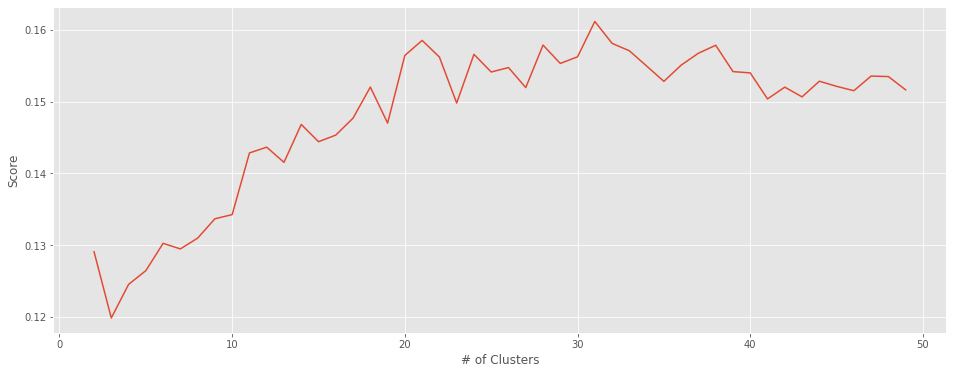

Max Score
Cluster #    Cluster Score
2       2.518032
Min Score
Cluster #     Cluster Score
31       1.320084


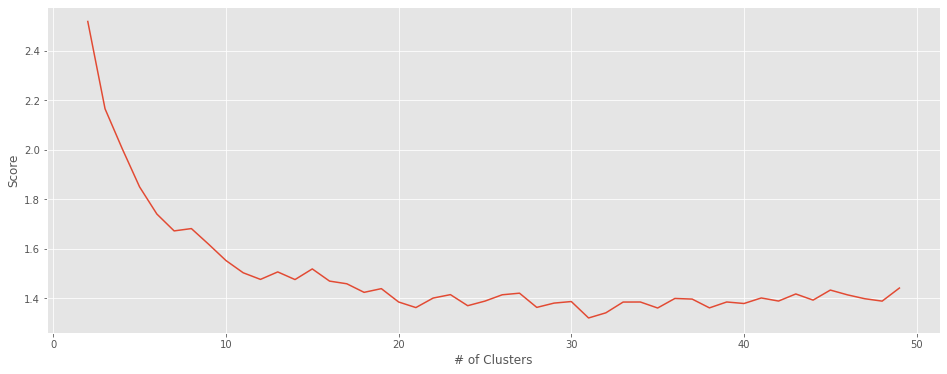

In [128]:
plot_evaluation(s_scores) # higher score is better
plot_evaluation(db_scores) # lower score is better

In [129]:
k_means = KMeans(n_clusters=31)

k_means.fit(user_df)

final_cluster_assignments = k_means.predict(user_df)

final_df = pd.DataFrame(scaler.inverse_transform(user_df), columns=user_df.columns)
final_df["Cluster Assignment"] = final_cluster_assignments

In [130]:
final_df.head()

,Improvement,Average Time,Age,Height,Weight,Dist/Week,Cluster Assignment
0,-1.010179,633.0,39.0,61.0,105.017534,0.850424,3
1,-9.957879,528.0,32.0,62.0,184.584550,3.066815,0
2,0.828249,495.0,58.0,61.0,245.046504,21.775578,5
3,1.057192,476.0,29.0,62.0,211.751638,28.567334,23
4,8.443771,351.0,26.0,66.0,109.342394,9.980856,8


In [142]:
init_df["Cluster Assignment"] = final_cluster_assignments
init_df.head()

,User ID,Fname,Lname,Improvement,Average Time,Age,Height,Weight,Dist/Week,Cluster Assignment
0,709,Thomas,Escobar,-1.010179,633,39,61,105.017534,0.850424,3
1,329,Kathryn,Mccalla,-9.957879,528,32,62,184.584550,3.066815,0
2,28,Patricia,Williams,0.828249,495,58,61,245.046504,21.775578,5
3,2301,Leon,Shiigi,1.057192,476,29,62,211.751638,28.567334,23
4,2592,Larry,Saran,8.443771,351,26,66,109.342394,9.980856,8


In [203]:
init_df.to_csv("fake_data2.csv", index=False)

In [109]:
final_df["user_id"] = sample_without_replacement(n_population=1000, n_samples=num_ppl)

In [110]:
final_df.head()

,Improvement,Average Time,Age,Height,Weight,Dist/Week,Cluster Assignment,user_id
0,1.384077,710.0,19.0,64.0,108.866993,22.828873,26,924
1,-0.555095,494.0,28.0,54.0,168.057065,26.799511,38,553
2,-2.203824,611.0,15.0,76.0,132.612890,24.054791,26,100
3,1.823069,352.0,35.0,49.0,93.571538,19.486384,41,48
4,-9.815901,495.0,58.0,61.0,245.046504,21.775578,11,237


In [ ]:
A = [(1., 700., 21, 64, weight, dist/week, user_id)]

In [216]:
# users format: ['user_id', 'user_id']
def find_matches(users, df):
  cluster_dict = dict()
  matches = []
  matchless = []

  for user in users:
    cluster_dict[user] = None

  for i, user in enumerate(users):
    if i == len(users) - 1:
      matchless.append(users[i])
    
    if cluster_dict[users[i]] == -1:
      continue

    cluster_dict[users[i]] = df.loc[df["User ID"] == users[i]].iloc[0][9]
    matched = False

    for potential_match in users[i+1:]:
      if cluster_dict[potential_match] == None:
        cluster_dict[potential_match] = df.loc[df["User ID"] == potential_match].iloc[0][9]
      
      if cluster_dict[users[i]] == cluster_dict[potential_match]:
        # print("users[i]:", users[i], "potential_match:", potential_match)
        # print("cluster_dict[users[i]]:", cluster_dict[users[i]], "cluster_dict[potential_match]:", cluster_dict[potential_match])
        matches.append((users[i], potential_match))
        cluster_dict[users[i]] = -1
        cluster_dict[potential_match] = -1
        matched = True
        break
    
    if not matched:
      matchless.append(users[i])

  for i in range(0, len(matchless), 2):
    if i + 1 < len(matchless):
      matches.append((matchless[i], matchless[i+1]))
    if i == len(matchless) - 1:
      matches.append((matchless[i], None))

  return matches

In [217]:
find_matches([709, 440, 697, 134, 2981, 329, 28, 2301, 1578, 652], init_df)

users[i]: 440 potential_match: 652
cluster_dict[users[i]]: 1 cluster_dict[potential_match]: 1
users[i]: 697 potential_match: 134
cluster_dict[users[i]]: 8 cluster_dict[potential_match]: 8


[(440, 652), (697, 134), (709, 2981), (329, 28), (2301, 1578), (652, None)]

In [148]:
init_df.head()

,User ID,Fname,Lname,Improvement,Average Time,Age,Height,Weight,Dist/Week,Cluster Assignment
0,709,Thomas,Escobar,-1.010179,633,39,61,105.017534,0.850424,3
1,329,Kathryn,Mccalla,-9.957879,528,32,62,184.584550,3.066815,0
2,28,Patricia,Williams,0.828249,495,58,61,245.046504,21.775578,5
3,2301,Leon,Shiigi,1.057192,476,29,62,211.751638,28.567334,23
4,2592,Larry,Saran,8.443771,351,26,66,109.342394,9.980856,8


In [218]:
dum_dum = ['JordanSucksLmao', 'Jordan', 'Bettancourt', -3., 720, 60, 48., 250., 0.]

In [224]:
print(k_means.predict(np.asarray(dum_dum[3:]).reshape(1, -1)))

[7]
